In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt
# from nltk.tokenize import word_tokenize
from sklearn.datasets import load_files
import re
import seaborn as sns

# Import data

In [2]:
train_path = r"20news-bydate-train"
test_path = r"20news-bydate-test"

In [3]:
train = load_files(train_path, encoding='latin1')

In [4]:
test = load_files(test_path, encoding='latin1')

In [5]:
len(train.target_names)

20

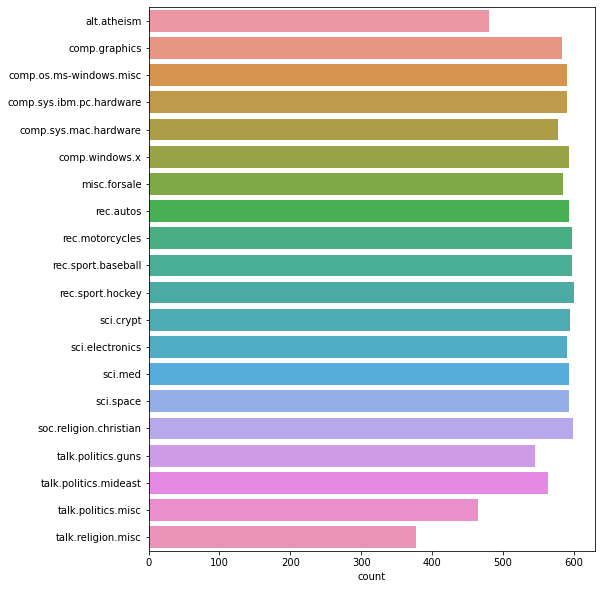

In [6]:
plt.subplots(figsize=(8,10))
sns.countplot(y=train.target)
plt.yticks(np.arange(len(train.target_names)), train.target_names)
plt.show()

# Preprocessing

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from string import punctuation

In [8]:
# nltk.download('stopwords')

## Stopwords

In [9]:
stopwords = set(line.strip() for line in open(r"nltk_data/corpora/stopwords/english",encoding="utf8"))
new_stopwords = {'subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still'}

In [10]:
stopwords = ENGLISH_STOP_WORDS.union(stopwords, new_stopwords, punctuation)
print(stopwords)

frozenset({'front', 'enough', 'very', 'had', 'whence', "don't", 'really', 'former', 'seemed', 'cry', '%', 'twenty', 'mine', 'any', 'nevertheless', 'noone', 'mustn', 'each', 'somewhere', 'hereupon', 'ten', 'meanwhile', 'seems', 'con', 'though', 'me', 'from:', 'his', 'm', 'more', 'sincere', 'both', 'at', "needn't", 'fire', 'then', 'isn', 'believe', '{', 'amoungst', 'third', 'message-id:', 'are', 'nothing', 'amongst', 'he', 'which', 'everyone', 'no', 'always', 'six', 'sixty', "hadn't", 'everywhere', '^', '&', 'think', 'once', 'find', 'is', "she's", 'ever', 'or', 'hereby', 'mostly', '.', '<', 'them', 'thru', 'newsgroups:', 'with', 'their', 'does', 'again', 'couldnt', 'xref:', 'fifty', 'elsewhere', 'and', 'do', 'detail', 'being', 'subject:', 'haven', 've', 'should', "shouldn't", 'another', 'how', 'whoever', 'himself', 'having', 'already', 'due', 'thus', "you'll", 'none', 'won', '@', 'eleven', 'same', 'doesn', 'been', "couldn't", 'cantaloupe.srv.cs.cmu.edu', 'further', 'we', 'writes:', 'nowh

## TF-IDF

In [11]:
vectorizer = TfidfVectorizer(lowercase=True, sublinear_tf=True, min_df=5, stop_words=stopwords, token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,3))

In [12]:
vectors = vectorizer.fit_transform(train.data)

In [13]:
vectors_test = vectorizer.transform(test.data)

# Classification Models

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import time

In [15]:
times = []
accuracy = {}
report = []
def acc_score(model):
    cv_results = cross_val_score(model,vectors,train.target,scoring="accuracy")
    accuracy.update({str(model) : np.mean(cv_results)})
    return np.mean(cv_results)

## Multinomial NB Model

In [16]:
MNB = MultinomialNB(alpha=0.01)
start = time.process_time()
MNB.fit(vectors, train.target)
# mid = time.process_time()
pred_MNB = MNB.predict(vectors_test)
end = time.process_time()
times.append(end-start)
print("Accuracy: " + str(acc_score(MNB)) + ", Time duration: " + str(end - start))

Accuracy: 0.8834184882472936, Time duration: 0.1875


In [42]:
report.append(classification_report(pred_MNB,test.target, output_dict=True))
print(classification_report(test.target, pred_MNB, target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.82      0.83       319
           comp.graphics       0.62      0.67      0.64       389
 comp.os.ms-windows.misc       0.77      0.60      0.68       394
comp.sys.ibm.pc.hardware       0.55      0.67      0.60       392
   comp.sys.mac.hardware       0.72      0.75      0.73       385
          comp.windows.x       0.76      0.79      0.78       395
            misc.forsale       0.67      0.80      0.73       390
               rec.autos       0.80      0.81      0.81       396
         rec.motorcycles       0.91      0.87      0.89       398
      rec.sport.baseball       0.91      0.89      0.90       397
        rec.sport.hockey       0.92      0.93      0.92       399
               sci.crypt       0.90      0.89      0.89       396
         sci.electronics       0.72      0.67      0.69       393
                 sci.med       0.86      0.71      0.78       396
         

## SGD Classifier Model

In [18]:
SGD = SGDClassifier(max_iter = 10000)
start = time.process_time()
SGD.fit(vectors, train.target)
# mid = time.process_time()
pred_SGD = SGD.predict(vectors_test)
end = time.process_time()
times.append(end-start)
print("Accuracy: " + str(acc_score(SGD)) + ", Time duration: " + str(end - start))

Accuracy: 0.9265511419822909, Time duration: 1.125


In [41]:
report.append(classification_report(pred_SGD,test.target, output_dict=True))
print(classification_report(test.target, pred_SGD, target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.76      0.81       319
           comp.graphics       0.75      0.77      0.76       389
 comp.os.ms-windows.misc       0.79      0.77      0.78       394
comp.sys.ibm.pc.hardware       0.75      0.72      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.86      0.83      0.85       395
            misc.forsale       0.83      0.92      0.87       390
               rec.autos       0.93      0.90      0.91       396
         rec.motorcycles       0.95      0.96      0.95       398
      rec.sport.baseball       0.90      0.96      0.93       397
        rec.sport.hockey       0.94      0.98      0.96       399
               sci.crypt       0.93      0.95      0.94       396
         sci.electronics       0.82      0.78      0.80       393
                 sci.med       0.91      0.88      0.89       396
         

## LinearSVC

In [20]:
SVC = LinearSVC(C=10)
start = time.process_time()
SVC.fit(vectors, train.target)
# mid = time.process_time()
pred_SVC = SVC.predict(vectors_test)
end = time.process_time()
times.append(end-start)
print("Accuracy: " + str(acc_score(SVC)) + ", Time duration: " + str(end - start))

Accuracy: 0.923280833834417, Time duration: 6.765625


In [40]:
report.append(classification_report(pred_SVC,test.target, output_dict=True))
print(classification_report(test.target, pred_SVC, target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.78      0.82       319
           comp.graphics       0.74      0.78      0.76       389
 comp.os.ms-windows.misc       0.80      0.76      0.78       394
comp.sys.ibm.pc.hardware       0.69      0.73      0.71       392
   comp.sys.mac.hardware       0.80      0.84      0.82       385
          comp.windows.x       0.88      0.83      0.85       395
            misc.forsale       0.82      0.91      0.86       390
               rec.autos       0.92      0.89      0.90       396
         rec.motorcycles       0.95      0.94      0.95       398
      rec.sport.baseball       0.91      0.95      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.94      0.92      0.93       396
         sci.electronics       0.79      0.79      0.79       393
                 sci.med       0.89      0.85      0.87       396
         

## K Neighbors Classifier Model

In [22]:
KNN = KNeighborsClassifier(n_neighbors=200)
start = time.process_time()
KNN.fit(vectors, train.target)
# mid = time.process_time()
pred_KNN = KNN.predict(vectors_test)
end = time.process_time()
times.append(end-start)
print("Accuracy: " + str(acc_score(KNN)) + ", Time duration: " + str(end - start))

Accuracy: 0.7882270938360658, Time duration: 5.75


In [39]:
report.append(classification_report(pred_KNN,test.target, output_dict=True))
print(classification_report(test.target, pred_KNN, target_names=test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.71      0.63       319
           comp.graphics       0.62      0.68      0.65       389
 comp.os.ms-windows.misc       0.72      0.67      0.69       394
comp.sys.ibm.pc.hardware       0.60      0.65      0.62       392
   comp.sys.mac.hardware       0.70      0.67      0.69       385
          comp.windows.x       0.71      0.80      0.75       395
            misc.forsale       0.79      0.78      0.79       390
               rec.autos       0.76      0.76      0.76       396
         rec.motorcycles       0.87      0.79      0.83       398
      rec.sport.baseball       0.92      0.81      0.86       397
        rec.sport.hockey       0.74      0.94      0.83       399
               sci.crypt       0.82      0.85      0.84       396
         sci.electronics       0.72      0.43      0.54       393
                 sci.med       0.87      0.60      0.71       396
         

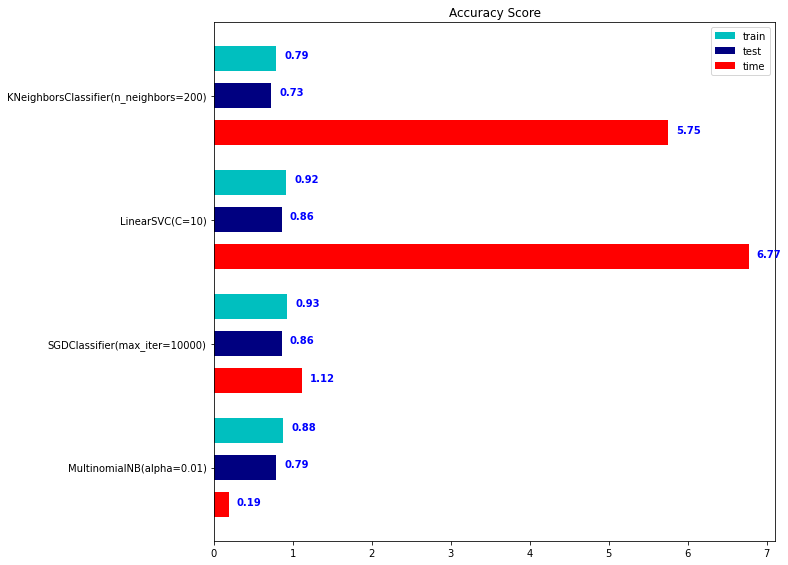

In [24]:
indices = np.arange(len(accuracy))
train_scores = np.around(list(accuracy.values()),2)
times = np.around(times,2)
test_scores = np.around([report[i]['accuracy'] for i in range(len(report))],2)

plt.figure(figsize=(12, 8))
plt.title("Accuracy Score")

plt.barh(indices + .3, train_scores, .2, label="train",color='c')
plt.barh(indices, test_scores, .2, label="test", color='navy')
plt.barh(indices - .3, times, .2, label="time", color='red')

plt.yticks(indices, list(accuracy.keys()))
plt.legend(loc='upper right')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=.05)

for i, v in enumerate(test_scores):
    plt.text(v+.1, i, str(v), color='blue', fontweight='bold')
for i, v in enumerate(train_scores):
    plt.text(v+.1, i+.3, str(v), color='blue', fontweight='bold')
for i, v in enumerate(times):
    plt.text(v+.1, i-.3, str(v), color='blue', fontweight='bold')

plt.show()

In [137]:
from tkinter import *
import random

root = Tk()

root.title("Classification")
root.geometry('600x500')

def get_class(text):
    vector = vectorizer.transform([text])
    result = SGD.predict(vector)
    print(result)
    return train.target_names[int(result)]

def Take_input(): 
    INPUT = inputtxt.get("1.0", "end-1c") 
    guess = get_class(INPUT)
    l.configure(text= 'Class: ' + str(guess))


inputtxt = Text(root, height = 20, 
                width = 50, 
                bg = "light yellow") 

Display = Button(root, height = 2, 
                 width = 20,  
                 text ="Show", 
                 command = lambda:Take_input()) 

l = Label(text = " Input your text", font=(None, 20)) 

inputtxt.pack() 
Display.pack()
l.pack(pady=(30,0)) 

root.mainloop()

[3]
